In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as date
import math

In [69]:
plot2 = pd.read_csv('data-plot-2.csv')
plot3 = pd.read_csv('data-plot-3.csv')
plot4 = pd.read_csv('data-plot-4.csv')

In [70]:
aqi_2022 = pd.concat([plot2,plot3,plot4], axis=0).reset_index()

In [71]:
aqi_2022 = aqi_2022.rename(columns={'Date and Time': 'datetime', 'PM<sub>10</sub>': 'pm10', 'PM<sub>2.5</sub>': 'pm2.5'})

In [72]:
aqi_2022.dtypes

index         int64
datetime     object
pm10        float64
pm2.5       float64
dtype: object

In [73]:
aqi_2022['datetime'] = pd.to_datetime(aqi_2022['datetime'])

In [74]:
aqi_2022.head()

,index,datetime,pm10,pm2.5
0,0,2022-01-01 00:00:00,5.52,4.14
1,1,2022-01-01 01:00:00,19.83,16.63
2,2,2022-01-01 02:00:00,22.05,19.49
3,3,2022-01-01 03:00:00,27.25,21.32
4,4,2022-01-01 04:00:00,31.48,24.13


# Handling missing values

### How many days of data is missing?

In [75]:
df = aqi_2022.set_index('datetime')
len(pd.date_range(start = aqi_2022['datetime'].min(), end = aqi_2022['datetime'].max()).difference(df.index))

13

### How many missing values?

In [76]:
aqi_2022.isna().sum()

index        0
datetime     0
pm10        79
pm2.5       78
dtype: int64

In [77]:
def fillMissingValues(row, col_name):
    datetime = row['datetime']
    row_val = row[col_name]
    if math.isnan(row_val):
        df = aqi_2022.set_index('datetime')
        df = df.resample('M').mean().reset_index()
        df['month'] = df['datetime'].dt.strftime("%m")
        datarrow = df[df['month'] == datetime.strftime("%m")]
        
        [value] = datarrow[col_name].values
        row_val = value

    return row_val

aqi_2022['pm10'] = aqi_2022.apply(lambda x: fillMissingValues(x, 'pm10'), axis = 1)
aqi_2022['pm2.5'] = aqi_2022.apply(lambda x: fillMissingValues(x, 'pm2.5'), axis = 1)

In [78]:
aqi_2022.isna().sum()

index       0
datetime    0
pm10        0
pm2.5       0
dtype: int64

### Visualising outliers

/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_21793/60726568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%b')


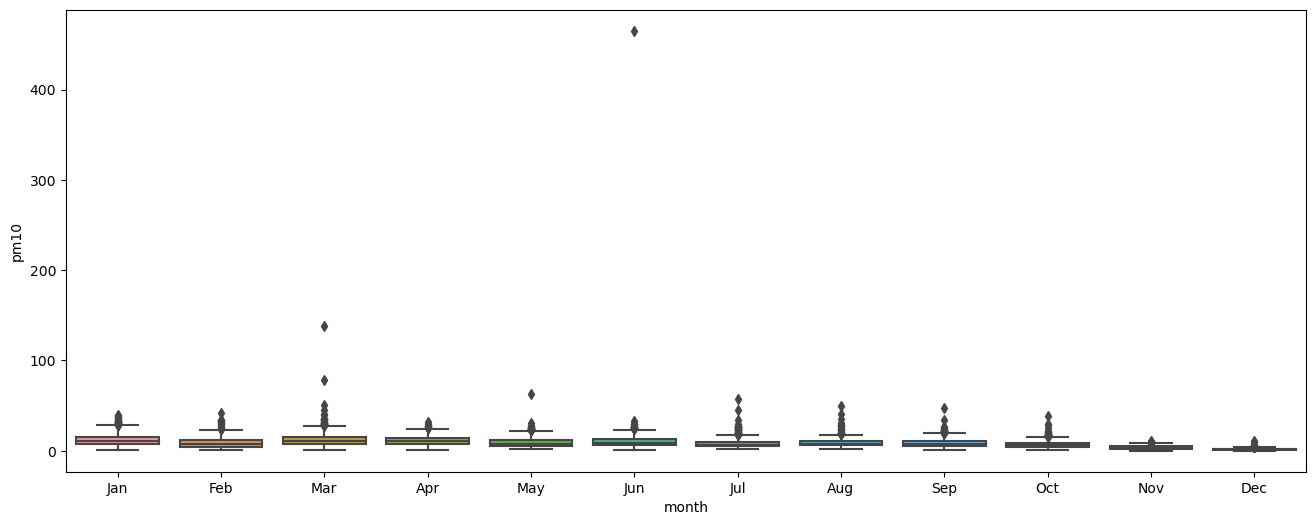

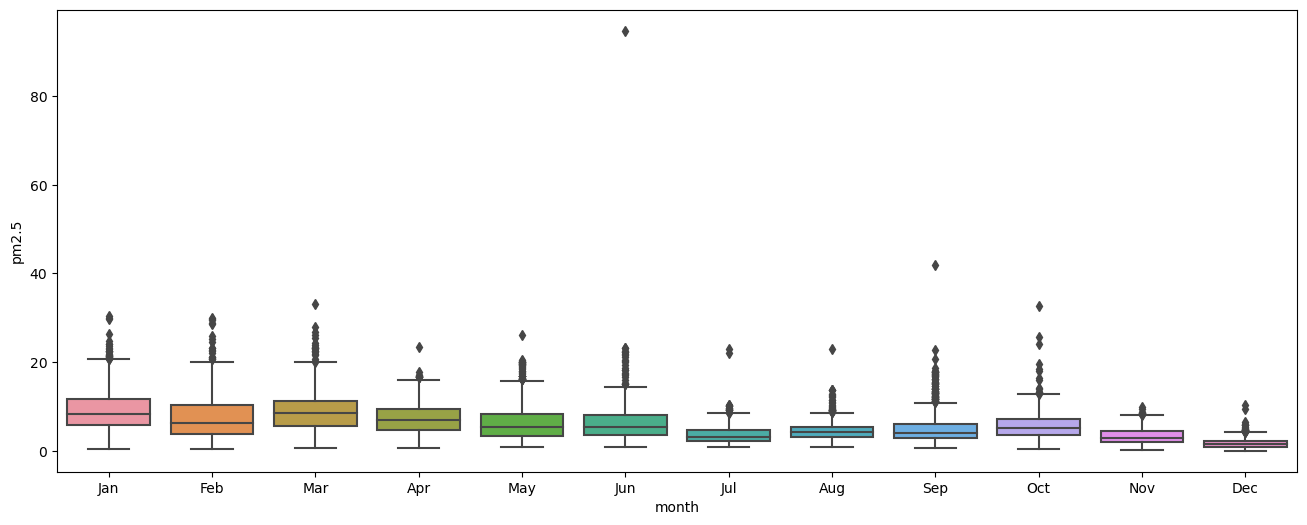

In [12]:
def plotbox(dataset,fromtime, to, title):
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]
    
    timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%b')
    
    plt.figure(figsize=(16, 6))
    
    sns.boxplot(data=timeframe, x='month', y='pm10')
    
    plt.show()
    
    plt.figure(figsize=(16, 6))
    
    sns.boxplot(data=timeframe, x='month', y='pm2.5')
    
    plt.show()

plotbox(aqi_2022,'2022-01-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')

    
    

### Visualising distribution

/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_21793/3157060375.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(timeframe['pm10'])


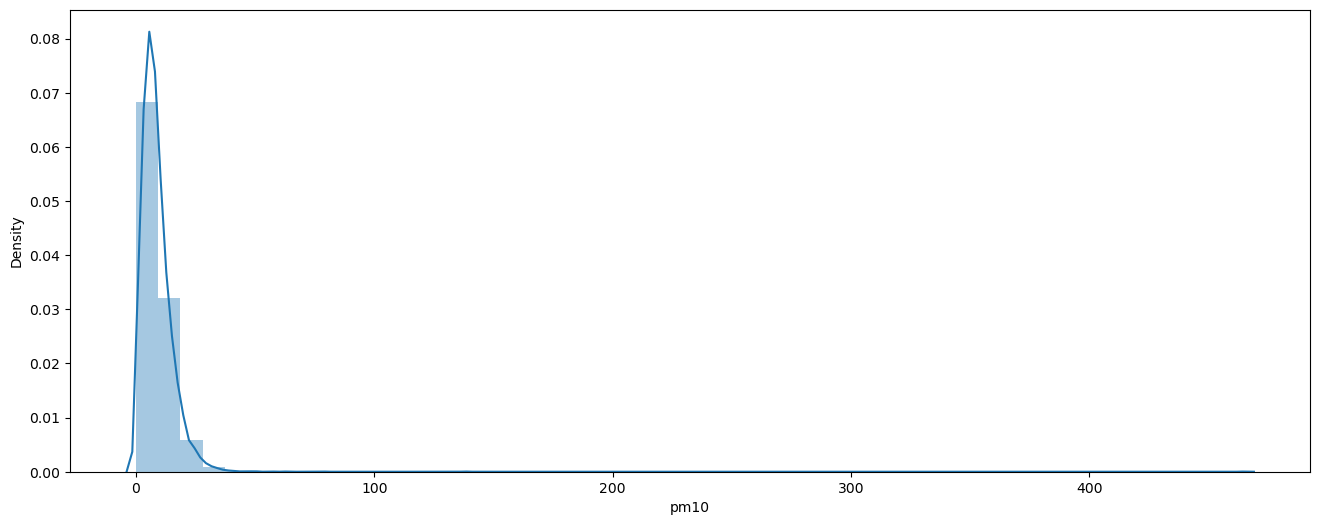

/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_21793/3157060375.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(timeframe['pm2.5'])


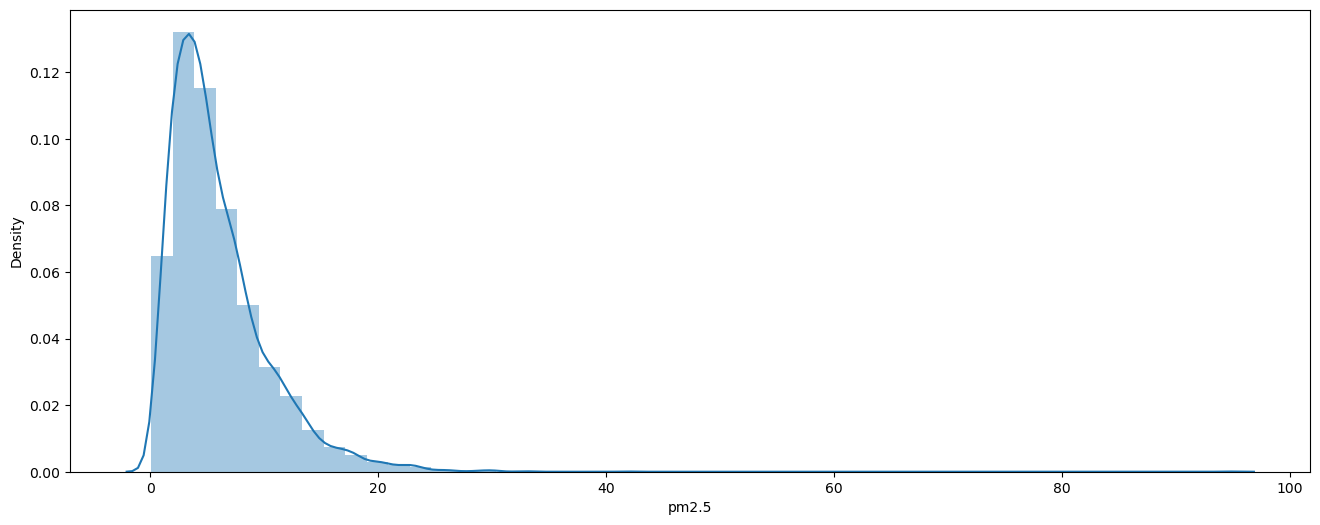

In [13]:
def plothistogram(dataset,fromtime, to, title):
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]
    
    #timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%b')
    
    plt.figure(figsize=(16, 6))
    
    sns.distplot(timeframe['pm10'])
    
    plt.show()
    
    plt.figure(figsize=(16, 6))
    
    sns.distplot(timeframe['pm2.5'])
    
    plt.show()

plothistogram(aqi_2022,'2022-01-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')

    
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


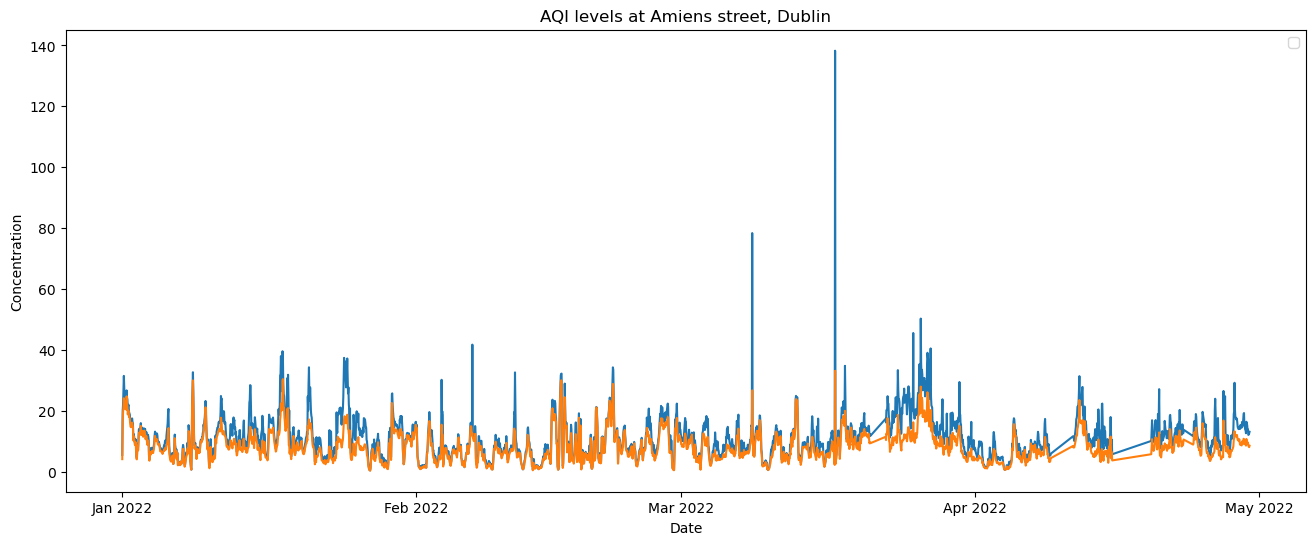

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


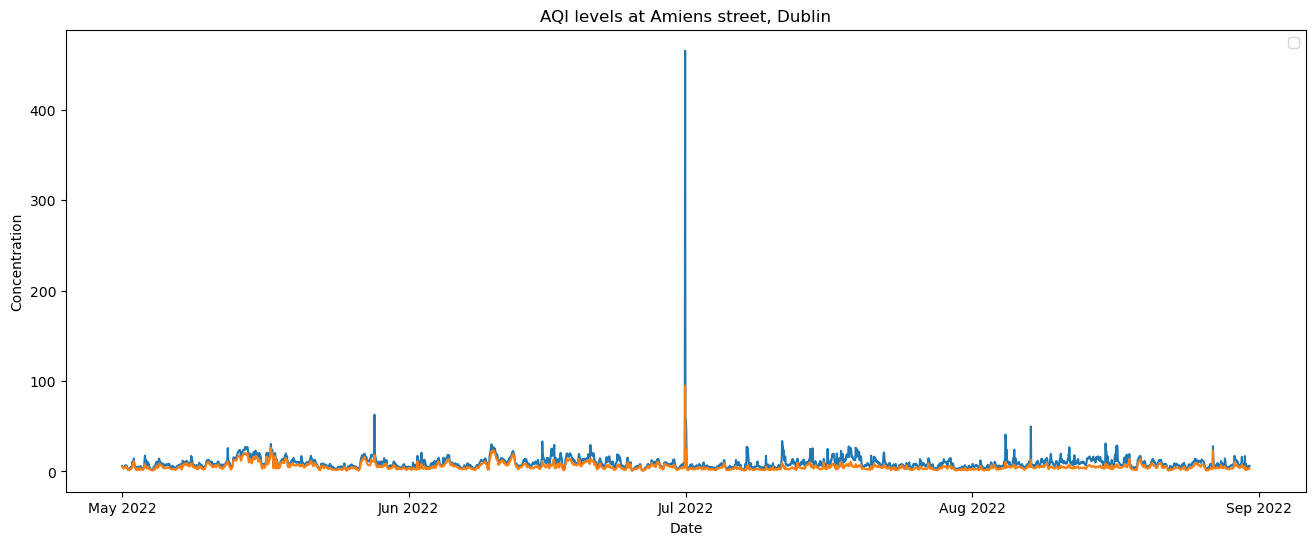

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


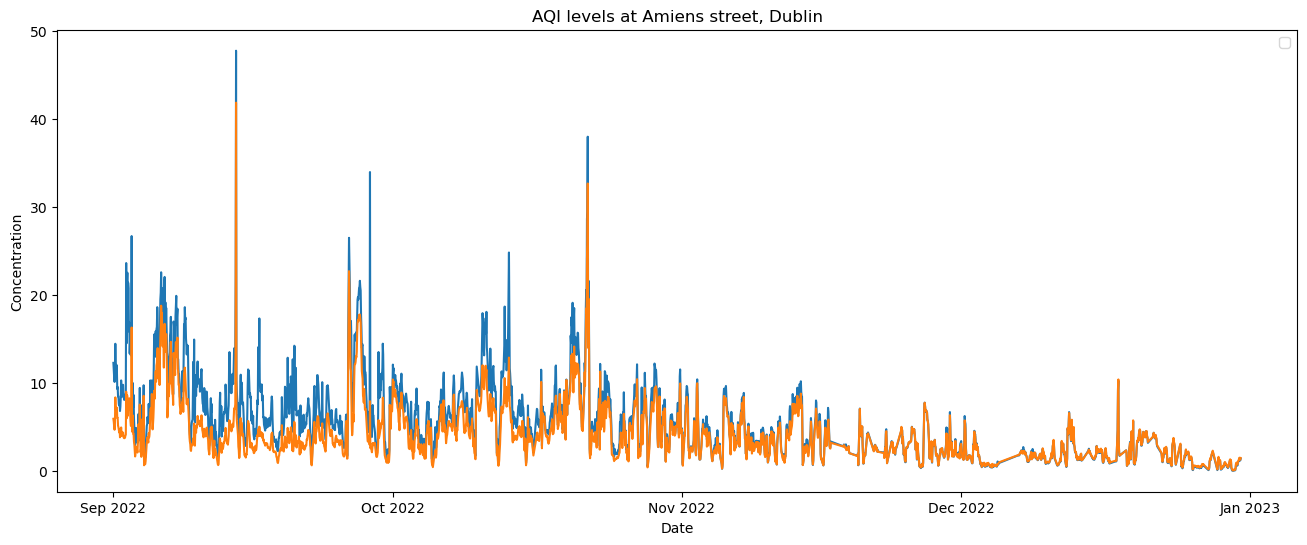

In [14]:
import matplotlib.dates as mdates

def plotline(dataset,fromtime, to, title):
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]

    plt.figure(figsize=(16, 6))
    sns.lineplot(data=timeframe, x='datetime', y='pm10')
    sns.lineplot(data=timeframe, x='datetime', y='pm2.5')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.title(title)

    date_formatter = mdates.DateFormatter('%b %Y')  # Format as abbreviated month and year (e.g., Jan 2022)
    desired_tick_frequency = mdates.MonthLocator()
    # Apply the tick frequency and formatter to the x-axis
    plt.gca().xaxis.set_major_locator(desired_tick_frequency)
    plt.gca().xaxis.set_major_formatter(date_formatter)
    
    plt.legend()
    
    plt.show()

plotline(aqi_2022,'2022-01-01', '2022-04-30', 'AQI levels at Amiens street, Dublin')

plotline(aqi_2022,'2022-05-01', '2022-08-31', 'AQI levels at Amiens street, Dublin')

plotline(aqi_2022,'2022-09-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')


/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_21793/505780775.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%m')
/var/folders/6k/3vmlhmb52cx2vjf55_z_zgg00000gn/T/ipykernel_21793/505780775.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe.loc[:, 'day'] = timeframe['datetime'].dt.strftime('%d')


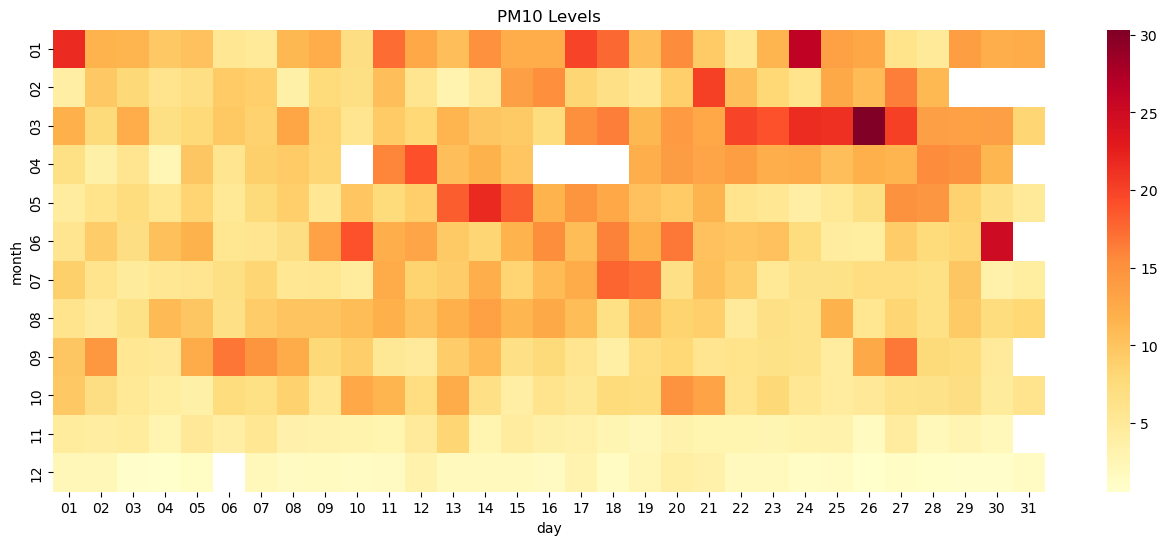

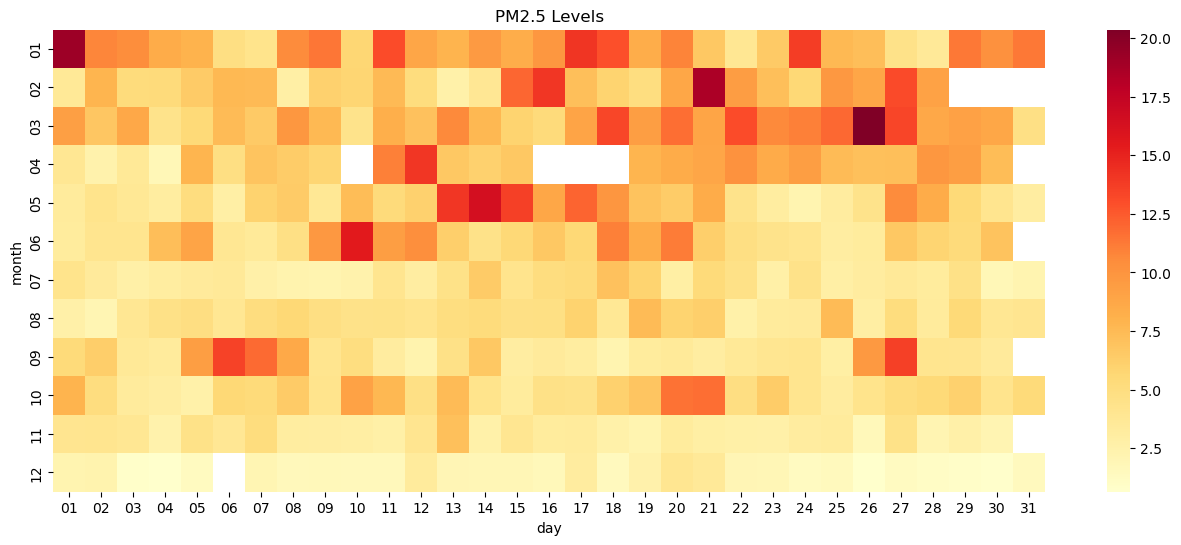

In [67]:

def plotheatmap(dataset, fromtime, to, title):
    dataset = dataset.reset_index()
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]
    
    timeframe.loc[:, 'month'] = timeframe['datetime'].dt.strftime('%m')
    timeframe.loc[:, 'day'] = timeframe['datetime'].dt.strftime('%d')
    
    timeframe_pm10 = timeframe.pivot_table(index = 'month',values='pm10', columns='day')
    #g = sns.FacetGrid(timeframe, col="month", col_wrap=2)
    
    #g.map_dataframe(lambda data, color: sns.heatmap(data=timeframe, cmap='YlOrRd'))
    plt.figure(figsize=(16, 6))
    sns.heatmap(data=timeframe_pm10, cmap='YlOrRd')
    
    plt.title("PM10 Levels")
    plt.show()
    
    timeframe_pm25 = timeframe.pivot_table(index = 'month',values='pm2.5', columns='day')
    #g = sns.FacetGrid(timeframe, col="month", col_wrap=2)
    
    #g.map_dataframe(lambda data, color: sns.heatmap(data=timeframe, cmap='YlOrRd'))
    plt.figure(figsize=(16, 6))
    sns.heatmap(data=timeframe_pm25, cmap='YlOrRd')
    
    plt.title("PM2.5 Levels")
    plt.show()

plotheatmap(aqi_2022,'2022-01-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')



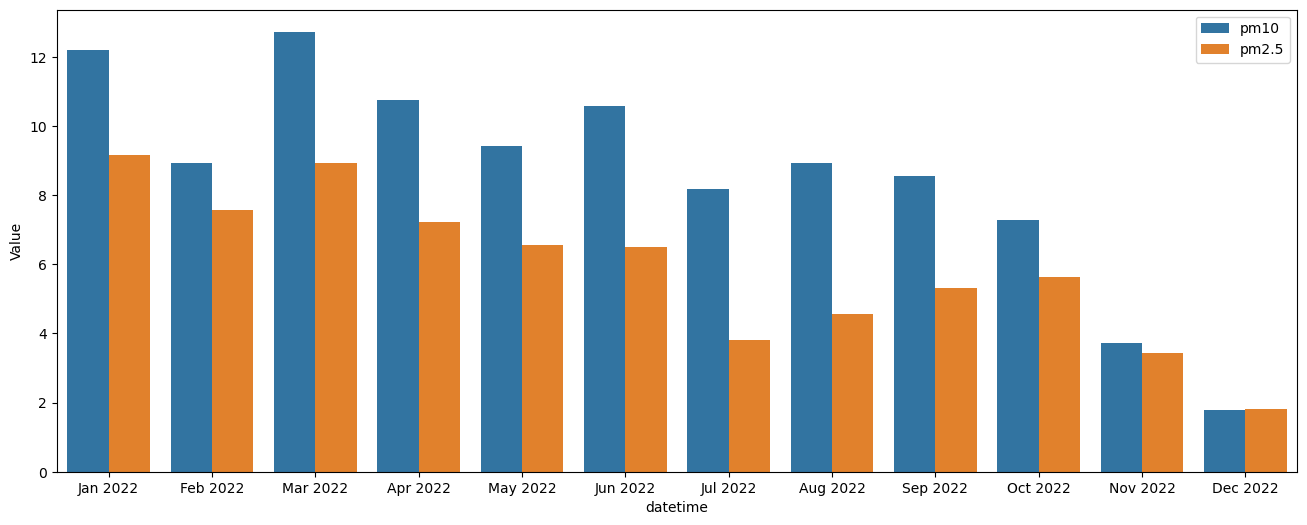

In [16]:
def plotbars(dataset, fromtime, to, title):
    timeframe = dataset[(dataset['datetime'] >= fromtime)
                         & (dataset['datetime'] <= to)]
    
    timeframe.set_index('datetime', inplace=True)
    
    timeframe = timeframe.resample('M').mean().reset_index()
    
    plt.figure(figsize=(16, 6))
    
    df_melted = pd.melt(timeframe, id_vars='datetime', value_vars=['pm10', 'pm2.5'], var_name='Pollutant', value_name='Value')

    # Create the grouped bar plot using seaborn
    sns.barplot(data=df_melted, x='datetime', y='Value', hue='Pollutant')

    plt.gca().xaxis.set_major_formatter(plt.FixedFormatter([date.strftime('%b %Y') for date in timeframe['datetime']]))

    plt.legend()
    
    plt.show()

plotbars(aqi_2022,'2022-01-01', '2022-12-31', 'AQI levels at Amiens street, Dublin')    
